# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

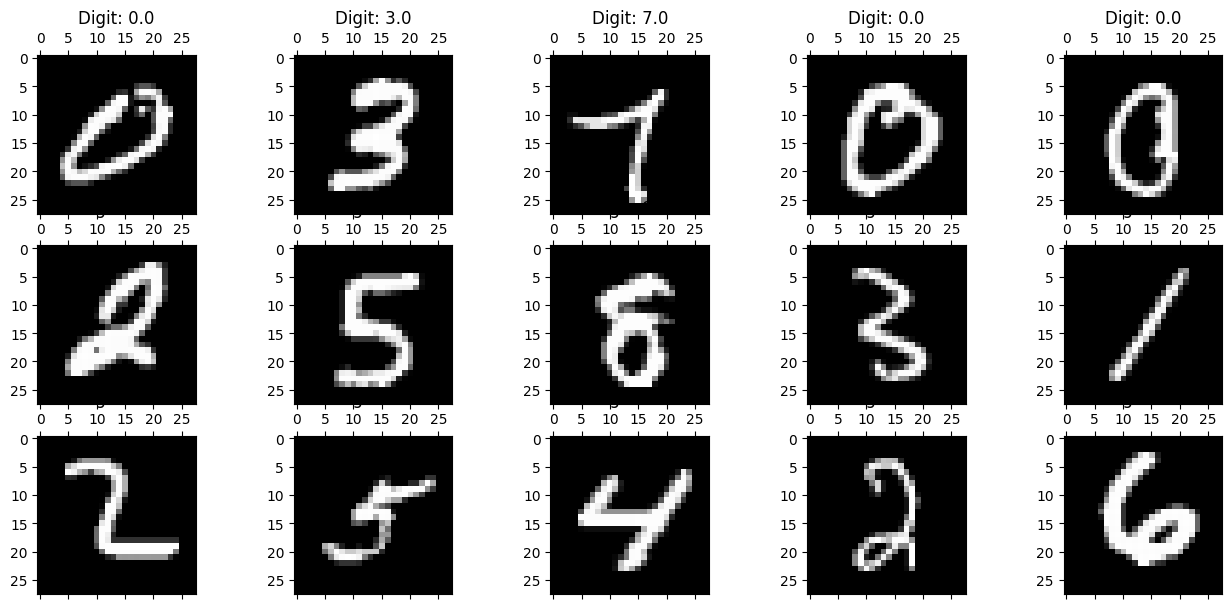

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [13]:
# 차원축소를 하기 전 표준화 작업을 하자
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled  = standard_scaler.transform(X_test)

pca components 수를 결정하기 위해 다음 3가지를 확인하자

- Kaiser's Rule : eigenvalue 값이 1이상인 주성분들
- Elbow point : 곡선의 기울기가 급격히 감소할 때의 지점
- 누적설명률이 70% ~ 80% 이상

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

*Kaiser's Rule*

In [26]:
# x_train의 공분산 구하기
cov_mat = np.cov(X_train.T)

# #eigenvalue & eigenvaector
lin.eig(cov_mat)

(array([ 3.35050342e+05,  2.45263314e+05,  2.10817699e+05,  1.84811735e+05,
         1.67507449e+05,  1.47827710e+05,  1.12333093e+05,  9.88431539e+04,
         9.43540004e+04,  8.02433859e+04,  7.21406558e+04,  6.99897083e+04,
         5.84254133e+04,  5.79312045e+04,  5.44198670e+04,  5.10179568e+04,
         4.52602938e+04,  4.38602463e+04,  4.06519582e+04,  3.95879424e+04,
         3.66355764e+04,  3.44575034e+04,  3.28960844e+04,  3.11563852e+04,
         3.03979934e+04,  2.87547480e+04,  2.77411819e+04,  2.70880561e+04,
         2.54026266e+04,  2.35870032e+04,  2.24719319e+04,  2.21032650e+04,
         2.05705236e+04,  2.01288903e+04,  1.95179012e+04,  1.85838893e+04,
         1.73353724e+04,  1.66695751e+04,  1.63800487e+04,  1.60350781e+04,
         1.55825505e+04,  1.52570529e+04,  1.43250896e+04,  1.35468203e+04,
         1.32059468e+04,  1.29051272e+04,  1.24152209e+04,  1.19465740e+04,
         1.15559127e+04,  1.09984358e+04,  1.08705664e+04,  1.06231981e+04,
         1.0

In [30]:
e_value, e_vector = lin.eig(cov_mat)

# 고유값이 1 이상인 개수 : 653
print(sum(e_value > 1)) 

pca_model = PCA(653).fit(X_train_scaled)

X_train_pca = pca_model.transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

pca_model.components_

653


array([[-1.98862643e-19, -1.11022302e-16, -5.55111512e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.92681290e-20, -5.55111512e-17, -8.32667268e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.84790370e-19, -1.66533454e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 4.74716382e-19,  8.81998467e-17, -3.29814301e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07233917e-17, -2.84494650e-16, -9.57567359e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.97920663e-18, -2.29634020e-16,  1.28369537e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

*elbow point*

In [33]:
pca_model.n_components_

653

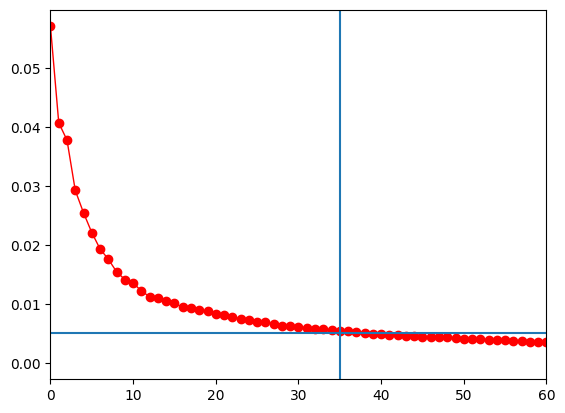

In [60]:
ex_ratio = pca_model.explained_variance_ratio_

plt.plot(range(len(ex_ratio)), ex_ratio, 'ro-', linewidth=1)
plt.xlim(0,60)
plt.axvline(x = 35)
plt.axhline(y = 0.005)


- 주성분 개수 35 정도가 적당해 보임

*누적설명률이 70 ~ 80%*

In [65]:
for per in [70, 75, 80]:
    pca = PCA(n_components=(per/100))
    pca.fit(X_train_scaled)
    print(f"누적 설명률 : {per}% => 주성분 개수 : {pca.n_components_}")

누적 설명률 : 70% => 주성분 개수 : 96
누적 설명률 : 75% => 주성분 개수 : 118
누적 설명률 : 80% => 주성분 개수 : 146


- 주성분 개수 118개가 적당해 보임

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

*randomforest*

In [79]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import time

- original

In [76]:
rf_model_origin = RandomForestClassifier()
start = time.time()
rf_model_origin.fit(X_train_scaled, y_train)

print(f"score : {rf_model_origin.score(X_test_scaled, y_test)}")
print(f"time : {time.time() - start}")

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


score : 0.9721428571428572
time : 33.814812898635864


- pca

In [73]:
# pca 차원축소
pca = PCA(n_components=118)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [77]:
rf_model_pca = RandomForestClassifier()
start = time.time()
rf_model_pca.fit(X_train_pca, y_train)

print(rf_model.score(X_test_pca, y_test))
print(f"time : {time.time() - start}")

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9364285714285714
time : 67.91798710823059


*lightGBM*

- original

In [82]:
gbm = lgb.LGBMClassifier()
start = time.time()
gbm.fit(X_train_scaled, y_train)

print(f"score : {gbm.score(X_test_scaled, y_test)}")
print(f"time : {time.time() - start}")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score : 0.978
time : 64.15524482727051


- pca

In [83]:
# pca 차원축소
pca = PCA(n_components=118)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [84]:
gbm = lgb.LGBMClassifier()
start = time.time()
gbm.fit(X_train_pca, y_train)

print(gbm.score(X_test_pca, y_test))
print(f"time : {time.time() - start}")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9592857142857143
time : 18.24376893043518


특정한 틀 없이 자유롭게 해주시면 됩니다!